# CEE 201: Linear Programming with Jupyter Notebooks

## Allocating work effort at 2 mines
### ReVelle et al. book, Ch. 3, Ex. 3.3 p.52

In [1]:
# Import python packages numpy, matplotlib, and pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pulp

### Problem Statement
Company has two mines whose ores contain both copper and nickel minerals. Company was contracted to provide 100 tons per week of copper and 140 tons of nickel. Daily operating costs have been estimated at $\$3,000$ and  $\$9,000$ for mine 1 and 2, respectively. We assume that neither mine can be in operation for more than 5 days per week. The tons of copper and nickel produced in a day are shown in the table below:

| Resource      | Mine 1      | Mine 2      | Weekly Requirements     |
|-------------|-------------|-------------|-------------|
| Daily tons of copper     | 40 | 15     | 100|
| Daily tons of nickel| 14  | 35  | 140  |
| Daily operating costs (thousands) | \$3 | \$9 |   |

Our **objective** is to set up a linear program that will show the company how to meet its contract obligations at the least total cost. We need to determine the number of days that the mines will be operating per week (max working days per week 5) while minimizing the total cost

## Model Formulation
### Decision Variables
$x_1$: the number of days per week that we operate mine 1 \
$x_2$: the number of days per week that we operate mine 2

### Objective Function & Constraints
#### Minimizing total operating cost
$Z=3x_1+9x_2$

#### Production costraints
* At least 100 tons of copper must be mined each week \
$40x_1+15x_2\geq 100$
* At least 140 tons of nickel must be mined each week \
$14x_1+35x_2\geq 140$
* Mine 1 cannot operate more than 5 days per each week \
$x_1\leq 5$
* Mine 1 cannot operate more than 5 days per each week \
$x_2\leq 5$
* Hours of operation per week cannot be negative \
$x_1 \geq 0$, 
$x_2 \geq 0$


### Problem Solution
#### Graphical Solution

In [2]:
# Construct lines
# x1 > 0
x = np.linspace(0, 20, 2000)
x10 = np.linspace(0, 20, 2000)
y = np.linspace(0, 20, 2000)
# x1 <= 5
x1 = (y*0) + 5
# x2 <= 5
y1 = (x*0) + 5
# 40x1+15x2 <= 100
y2 = (100-40*x)/15.0
# 14x1+35x2 <= 140
y3 = (140-14*x)/35.0

Then, we plot the constraints as equalities:

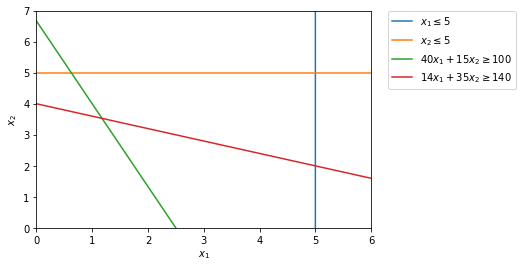

In [3]:
# Make plot
plt.plot(x1, y, label=r'$x_1\leq 5$')
plt.plot(x, y1, label=r'$x_2\leq 5$')
plt.plot(x, y2, label=r'$40x_1+15x_2\geq 100$')
plt.plot(x, y3, label=r'$14x_1+35x_2\geq 140$')
plt.xlim((0, 6))
plt.ylim((0, 7))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Then, we fill the feasible region in accordance to the constrains inequalities:

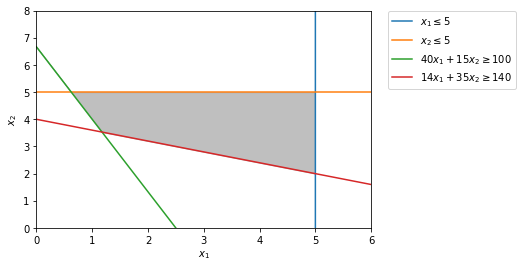

In [4]:
# Fill feasible region
plt.plot(x1, y, label=r'$x_1\leq 5$')
plt.plot(x, y1, label=r'$x_2\leq 5$')
plt.plot(x, y2, label=r'$40x_1+15x_2\geq 100$')
plt.plot(x, y3, label=r'$14x_1+35x_2\geq 140$')
plt.xlim((0, 6))
plt.ylim((0, 8))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
y5 = np.maximum(y1,y2)
y6 = np.maximum(y2, y3)
plt.fill_between(x, y5,y6, where=x<5,  color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Our solution lies somewhere in the grey feasible region in the graph above.\
\
It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are only 4 corners to our feasible region, so we can find the solutions for each corner to find our minimum. 

### Solution
We need to examine the value of the objective function $Z$ at the 4 corners, which are the intersections of the system of equations below. 

| Line 1 | Line 2 | $x_1$ | $x_2$ | $Z$ Value |
|:-----------------------:|:-----------------------:|-----------------|------------------|-----------|
| $x_1 \leq 5$ | $x_2 \leq 5$ | 5 | 5 | 60.00 |
| $x_1 \leq 5$ | $14x_1+35x_2\geq 140$ | 5 | 2 | 33.00 |
| $40x_1+15x_2\geq 100$ | $14x_1+35x_2\geq 140$ | $1\frac{3}{17}$ | $3 \frac{9}{17}$ | 35.29 |
| $40x_1+15x_2\geq 100$ | $x_2 \leq 5$ | $\frac{5}{8}$ | 5 | 46.88 |

The **minimum solution** $Z=33.00$ is for $x_1=5$ and $x_2=2$. 
Below we plot the feasible region with the objective function and we see that $3x_1+9x_2=33$ intersects with the feasible region at $x_1=5$ and $x_2=2$.

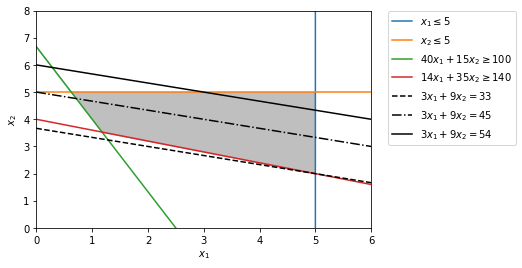

In [5]:
# Objective Function Value 1
y4 = (33-3*x)/9.0
# Objective Function Value 2
y5 = (45-3*x)/9.0
# Objective Function Value 3
y6 = (54-3*x)/9.0
# Fill feasible region
plt.plot(x1, y, label=r'$x_1\leq 5$')
plt.plot(x, y1, label=r'$x_2\leq 5$')
plt.plot(x, y2, label=r'$40x_1+15x_2\geq 100$')
plt.plot(x, y3, label=r'$14x_1+35x_2\geq 140$')
plt.plot(x, y4, 'k--', label='$3x_1+9x_2=33$')
plt.plot(x, y5,'k-.', label='$3x_1+9x_2=45$')
plt.plot(x, y6, 'k',label='$3x_1+9x_2=54$')
plt.xlim((0, 6))
plt.ylim((0, 8))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
y5 = np.maximum(y1,y2)
y6 = np.maximum(y2, y3)
plt.fill_between(x, y5,y6, where=x<5,  color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)